# Import libraries

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

In [257]:
# Import file
data = pd.read_csv('medical_examination.csv', index_col='id')
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Task 1

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

In [258]:
def calc_overweight(df):
    '''
    A simple function to caclulate BMI
    '''
    df['overweight'] = (df['weight'] / ((df['height']/100) ** 2)).to_numpy()
    df['overweight'] = np.where(df['overweight'] < 25, 0, 1)

    # Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol         or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
    df['cholesterol'] = np.where(df['cholesterol'] <= 1, 0, 1)
    df['gluc'] = np.where(df['gluc'] <= 1, 0, 1)
    return df


In [259]:
data1 = data.copy()

In [260]:
test = calc_overweight(data1)
test.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1


In [96]:
data2 = test.iloc[:,6:].copy()
data2.head(3)

,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,
0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,1
2,1,0,0,0,0,1,0
3,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0


In [98]:
data3 = pd.melt(data2,id_vars='cardio', var_name='metrics', value_name='values')

In [151]:
data3.head(3)

,cardio,metrics,values
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1


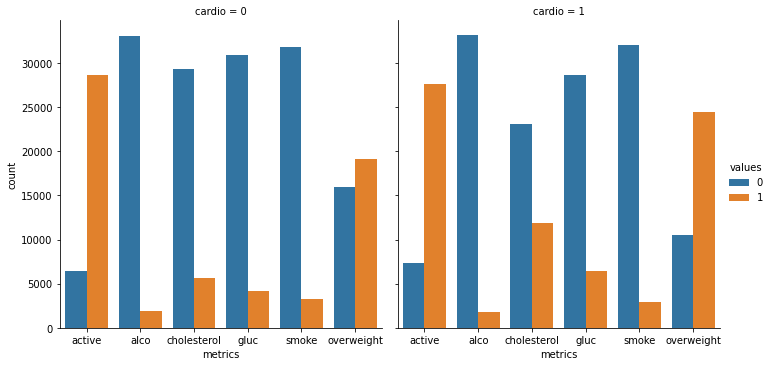

In [152]:
col_list = ['active','alco','cholesterol', 'gluc', 'smoke',  'overweight']
plot = sns.catplot(x='metrics',data=data3, kind='count', col='cardio', hue='values', order=col_list)
fig = plot.fig

# Task 2

In [154]:
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [203]:
data4 = data[data['ap_lo'] <= data['ap_hi']]

In [251]:
def height_per(data):
    '''
    A function that returns a dataframe with
    height percentiles greater than
    2.5 and 97.5
    '''
    data = data[data['ap_lo'] <= data['ap_hi']]
    data = data[(data['height']) >= data['height'].quantile(0.025)] 
    data = data[data['height'] <= data['height'].quantile(0.975)]

    return data


In [252]:
def weight_per(data):
    '''
    A function that returns a dataframe with
    weight percentiles greater than
    2.5 and 97.5
    '''
    data = height_per(data)
    data = data[(data['weight']) >= data['weight'].quantile(0.025)]
    data = data[data['weight'] <= data['weight'].quantile(0.975)]

    return data.reset_index()

In [261]:
data5 = weight_per(test)

In [262]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62784 entries, 0 to 62783
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62784 non-null  int64  
 1   age          62784 non-null  int64  
 2   gender       62784 non-null  int64  
 3   height       62784 non-null  int64  
 4   weight       62784 non-null  float64
 5   ap_hi        62784 non-null  int64  
 6   ap_lo        62784 non-null  int64  
 7   cholesterol  62784 non-null  int32  
 8   gluc         62784 non-null  int32  
 9   smoke        62784 non-null  int64  
 10  alco         62784 non-null  int64  
 11  active       62784 non-null  int64  
 12  cardio       62784 non-null  int64  
 13  overweight   62784 non-null  int32  
dtypes: float64(1), int32(3), int64(10)
memory usage: 6.0 MB


In [263]:
data5.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


<AxesSubplot:>

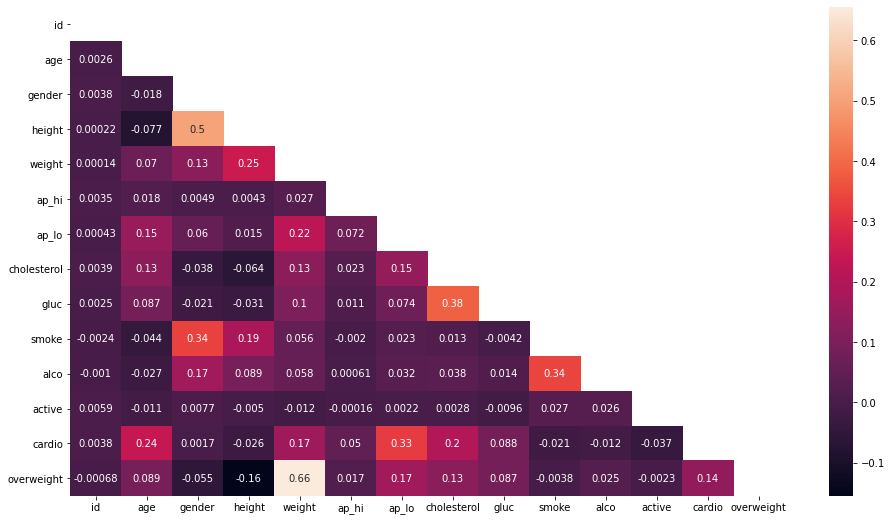

In [264]:
plt.figure(figsize=(16,9))
corr_mx = data5.corr()
mask_cols = np.triu(corr_mx)
sns.heatmap(corr_mx, annot=True, mask=mask_cols)

In [265]:
corr_mx

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,0.005890,0.003770,-0.000681
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.089088
gender,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.054636
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.155190
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.656110
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,-0.000162,0.050321,0.016895
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,0.002184,0.326125,0.169669
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,0.002804,0.202257,0.126846
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,-0.009629,0.088267,0.086867
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,0.027203,-0.020605,-0.003761
